In [1]:
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("../datasets/auto-mpg-processed.csv")

In [3]:
RANDOM_SEED = 2

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,35.0,4,72.0,69,1613,18.0,49
1,26.0,4,98.0,90,2265,15.5,47
2,23.7,3,70.0,100,2420,12.5,40
3,33.0,4,105.0,74,2190,14.2,39
4,30.5,4,98.0,63,2051,17.0,43


In [5]:
data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
30,18.0,6,225.0,105,3613,16.5,46
390,14.0,8,340.0,160,3609,8.0,50
353,32.4,4,108.0,75,2350,16.8,39
1,26.0,4,98.0,90,2265,15.5,47
81,18.5,6,250.0,110,3645,16.2,44


In [6]:
X = data[['displacement','horsepower','weight']]
Y = data[['mpg']]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2,random_state=RANDOM_SEED)

In [8]:
x_train.shape,y_train.shape

((313, 3), (313, 1))

In [9]:
x_test.shape,y_test.shape

((79, 3), (79, 1))

In [10]:
linear_model = LinearRegression(normalize=True).fit(x_train,y_train)

In [11]:
print("Training Score: ",linear_model.score(x_train,y_train)) #returns r-squared

Training Score:  0.7003806688437846


A linear model assumes a linear relationship between your input features and the output that you're trying to predict, and this linear relationship can be represented as Y is equal to WX + B, where W is the weight, or the coefficients that you use to multiply your X variables, the features. W is also referred to as the model weight or model parameters. You can use the linear model instance in order to get the coefficients for your X variables or the predictors. 

In [12]:
y_pred = linear_model.predict(x_test)

The R square on the training data for this model with additional features was much better. Let's use this model for prediction and store the predicted values in y_pred. Let's now calculate the R square score for the test data. And you can see that there is a significant improvement here as well.

In [13]:
from sklearn.metrics import r2_score
print("Testing Score: ",r2_score(y_test,y_pred))

Testing Score:  0.7334788038318676


Here testing score is better than training score and therefore we can say our model is good even though its not fantastic

The overall higher R square that we get with three features instead of one means that this model has better predictive power.

In [14]:
predictors = x_train.columns
predictors

Index(['displacement', 'horsepower', 'weight'], dtype='object')

Get the predictors from your x_train data frame, these are the columns of your data frame, and we'll instantiate a pandas series with a coefficient for each predictor. And let's print out these coefficients and see what they are.

In [15]:
linear_model.coef_

array([[-0.00711247, -0.04434433, -0.00514975]])

In [16]:
coeff = pd.Series(linear_model.coef_[0],predictors).sort_values()

print(coeff)

horsepower     -0.044344
displacement   -0.007112
weight         -0.005150
dtype: float64


 The coefficients of our linear model for horsepower, displacement, and weight are all negative. This indicates that as the values for these features increase, the mileage of the car tends to go down

 Let's plot the predicted values versus actual values from our dataset using a line chart, and see how closely they track one another.
 
 
 
 


In [17]:
y_test.head()

,mpg
55,32.0
70,20.5
313,40.8
179,29.0
307,14.0


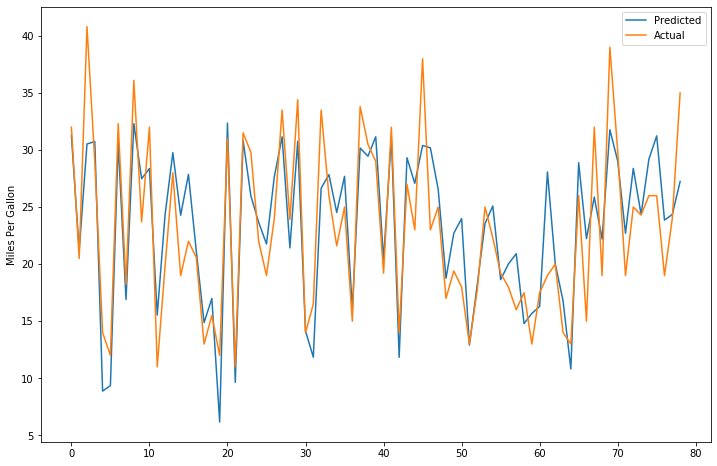

In [18]:
fig , ax = plt.subplots(figsize=(12,8))


plt.plot(y_pred,label = "Predicted")
plt.plot(y_test.values,label = "Actual") # note the use of y_test.values

plt.ylabel("Miles Per Gallon")

plt.legend()
plt.show()

 And here's what the result looks like. The values predicted by our model are in blue, and actual values are in orange. You can see that these two lines track each other pretty closely. Well, we added more features, we got a better model. What if we add even more features? Displacement, horsepower, and weight are the features that we're using currently.

 There are still some features in our dataset that we haven't used. I'm going to add those in here as well. I'm going to include acceleration, as well as the number of cylinders. There is still another feature that you could use, you could include the age of the car as well. That's something you can tweak if you want to. For now, I'm going to go over these five features to train our machine learning model.

### Check notebook - 004